# Image segmentation

In this notebook, we will apply clustering methods to image segmentation: Dividing an image into different parts. For example, a self-driving car will need to be able to identify a pedestrian. The code presented in this notebook does it in a very simple way: Color segmentation. We assume that parts of an image with similar colors are part of the same object. Each pixel is a data point, and each color is a cluster. Let's go:

In [1]:
from PIL import Image
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\frbj\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


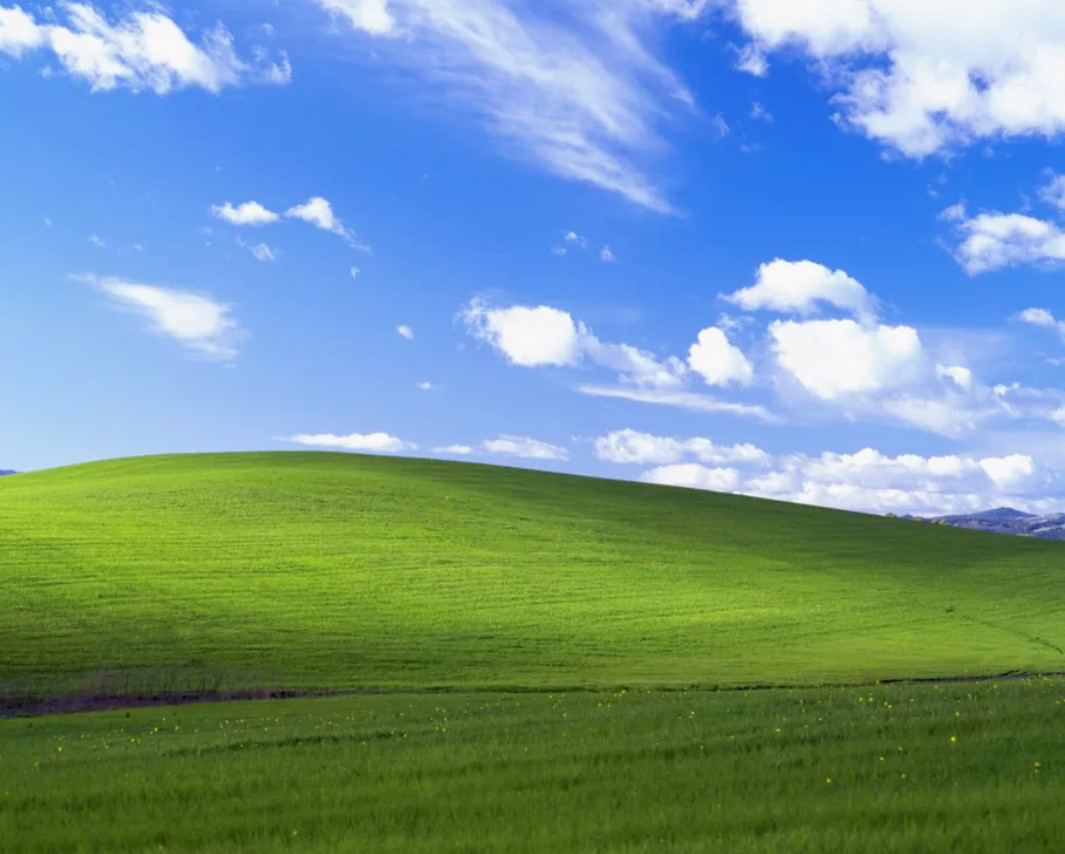

In [2]:
img = Image.open('famous_image.jpg')
img

The image is 854 by 1065 with 3 channels: red, blue and green. This gives us 854 x 1065 = 909510 data points with 3 features.

In [3]:
X_image = np.asarray(img)
X = X_image.reshape(-1, 3)
X.shape

(909510, 3)

Let's do _k_-means clustering with 2 clusters - we want to separate the ground from the sky:

In [4]:
kmeans = KMeans(n_clusters = 2, random_state = 42)
kmeans.fit(X)

KMeans(n_clusters=2, random_state=42)

Let's draw the segmented image:

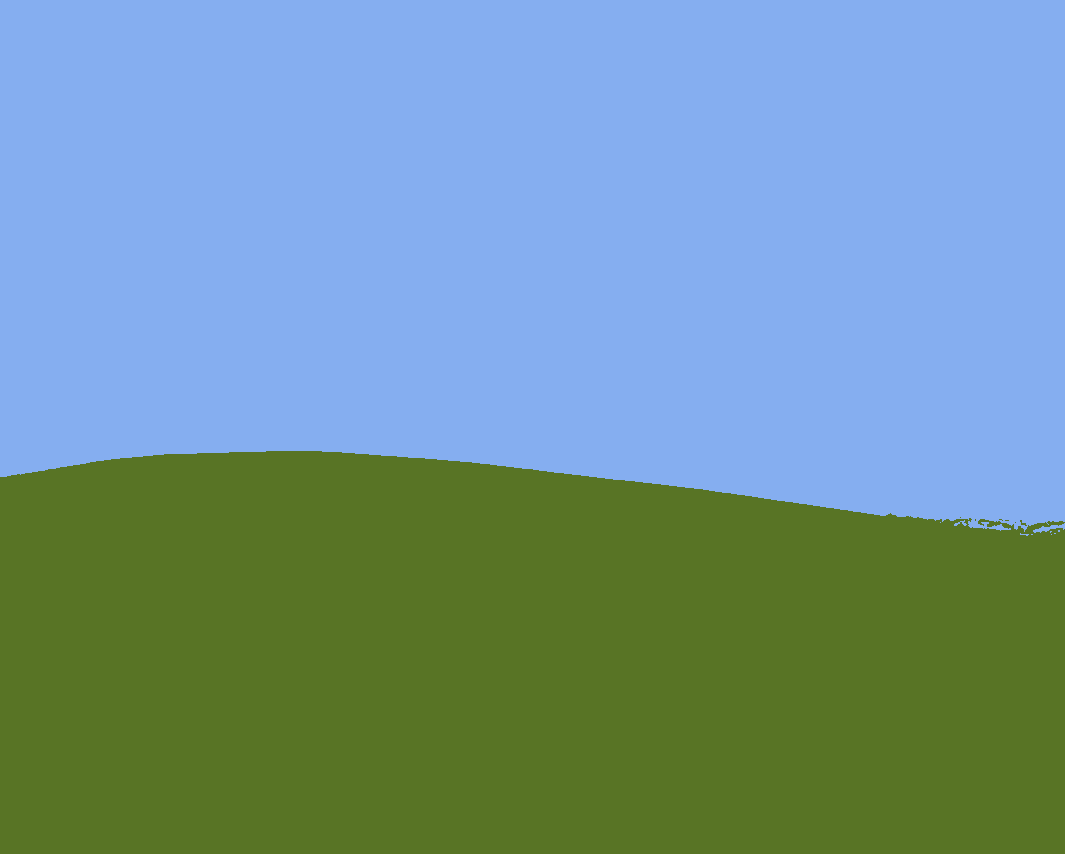

In [5]:
segmented_img = kmeans.cluster_centers_[kmeans.labels_] #turn each data point into its cluster center
segmented_img = segmented_img.reshape(X_image.shape)
Image.fromarray(segmented_img.astype(np.uint8))

Let's draw the image with their original colors, but only the ground - we make the sky white:

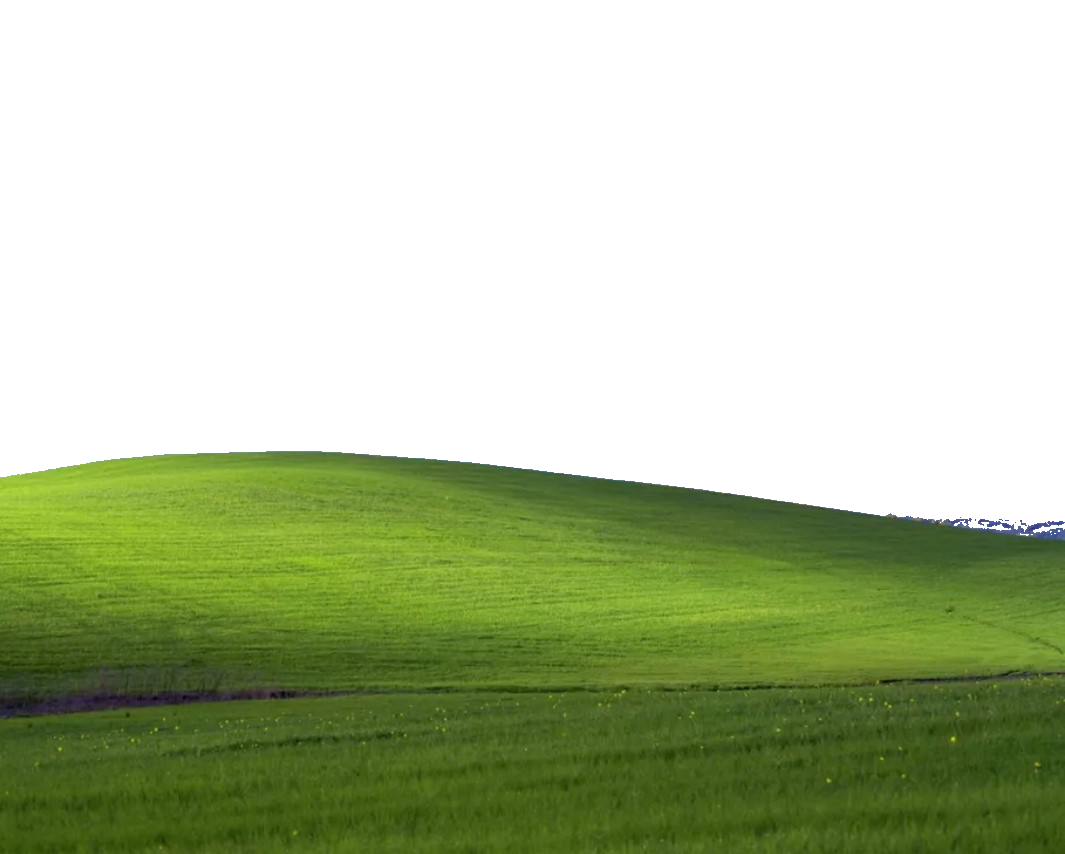

In [6]:
ground = X.copy()
for i in range(len(kmeans.labels_)):
    if kmeans.labels_[i] == 0:
        ground[i] = np.array([255, 255, 255])
ground = ground.reshape(X_image.shape)
Image.fromarray(ground.astype(np.uint8))

We just did automatic background removal! I encourage you to play around with the number of clusters (maybe you can separate the white clouds from the blue sky?), as well as trying out different images (remember that image from your vacation to Sicily that would have been perfect had you not been photobombed?)